# Python Programming Exercises

### Exercise 1
Write a program to solve a classic puzzle: There are 35 heads and 94 legs among the chickens and rabbits in a farm. How many rabbits and how many chickens do we have? Hint: Use for loop to iterate all possible solutions

In [1]:
# Number of chickens: c
# Number of rabbits: r
# Equation 1: c + r = 35
# Equation 2: 2*c + 4*r = 94

for c in range(36):
    r = 35 - c
    if 2*c + 4*r == 94:
        print("Number of \N{chicken}: ", c)
        print("Number of \N{rabbit}: ", r)


Number of 🐔:  23
Number of 🐇:  12


### Exercise 2
In this exercise, the task is to read a set of temperature data (the monthly high temperatures at Heathrow Airport from Jan 1948 through Dec 2016) from a file and then find some basic information: the highest and lowest temperatures, the mean (average) temperature, and the median temperature (the temperature in the middle if all the temperatures are sorted). The temperature data is in the file “data/Heathrow.txt”.

In [14]:
    import statistics as stats
    
    with open("data/Heathrow.txt", "r") as f:
        raw_data = f.readlines()
    
    # print(raw_data)
    data = [float(s.strip()) for s in raw_data]
    # print(data)
    print(f"Lowest: {min(data)}")
    print(f"Highest: {max(data)}")
    print(f"Mean: {sum(data)/len(data):.3f}")
    print(f"Mean: {stats.mean(data):.3f}")
    print(f"Median: {stats.median(data):.3f}")

Lowest: 0.8
Highest: 28.2
Mean: 14.848
Mean: 14.848
Median: 14.700


### Exercise 3
For the problem in Exercise 1, use NumPy by applying linear algebra to find the solution.

In [11]:
import numpy as np
# Equation 1: c + r = 35
# Equation 2: 2*c + 4*r = 94

coeffs = np.array([[1, 1], [2, 4]])
depvars = np.array([35, 94])
c, r = np.linalg.solve(coeffs, depvars)

print("Number of \N{chicken}: ", int(c))
print("Number of \N{rabbit}: ", int(r))

Number of 🐔:  23
Number of 🐇:  12


### Exercise 4
Solve Exercise 2 by using NumPy.

In [17]:
import numpy as np

data = np.loadtxt("data/Heathrow.txt")
# print(data)
# print(type(data))
print(data.ndim, data.shape, data.size)
print(f"Lowest: {np.min(data)}")
print(f"Highest: {np.max(data)}")
print(f"Mean: {np.mean(data):.3f}")
print(f"Median: {np.median(data):.3f}")

1 (828,) 828
Lowest: 0.8
Highest: 28.2
Mean: 14.848
Median: 14.700


### Exercise 5
Solve Exercise 2 by using Pandas. In addition, find out the hottest month between 1948 and 2016. Plot the mean temperature for each month.

   temperature
0          8.9
1          7.9
2         14.2
3         15.4
4         18.1
        temperature
min        0.800000
max       28.200000
mean      14.848309
median    14.700000
         temperature
1948-01          8.9
1948-02          7.9
1948-03         14.2
1948-04         15.4
1948-05         18.1
         temperature
2016-08         24.7
2016-09         22.4
2016-10         15.9
2016-11         10.5
2016-12         10.2
The hottest year and month: 2006-07. The temperature was 28.2.
    temperature
1      7.559420
2      8.007246
3     10.895652
4     13.908696
5     17.530435
6     20.814493
7     22.882609
8     22.426087
9     19.633333
10    15.452174
11    10.772464
12     8.297101


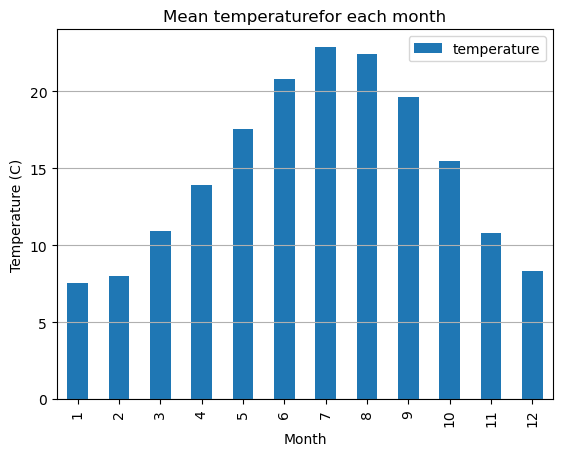

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Read data from text file into a Pandas dataframe
df = pd.read_csv("data/Heathrow.txt", header=None, names=['temperature'])
print(df.head())  # print the first 5 rows of the dataframe
print(df.aggregate(('min', 'max', 'mean', 'median')))  # Calculate and print the min, max, mean and median temperatures

# Set the index to a range of date, increment by month
df.index = pd.period_range(start=1948, periods=len(df), freq='M')
print(df.head())  # print first 5 rows
print(df.tail()) # print last 5 rows

# Sort the data by temperature in ascending order
df.sort_values(by='temperature', inplace=True)
print(f"The hottest year and month: {df.index[-1]}. The temperature was {df['temperature'].iloc[-1]}.")

# Group the temperatures by months (e.g. all temperatures for January will be grouped together)
groups = df. groupby(df.index.month)
print(groups.mean())  # Calculate and print the mean temperature for each group

# Plot the mean temperature for each month
groups.mean().plot.bar(title="Mean temperaturefor each month")
plt.xlabel("Month")
plt.ylabel("Temperature (C)")
plt.grid(axis="y")
plt.show()


### Exercise 6
Plot two cycles of a sinusoidal voltage waveform with an amplitude of 2 and frequency of 50Hz and a DC offset of 5V. Calculate the average voltage and root mean square (RMS) voltage.

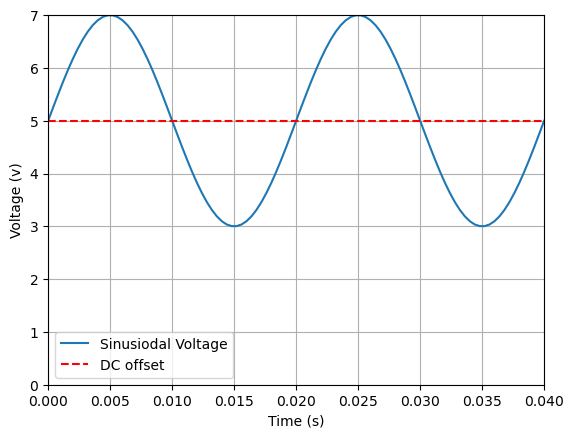

Average voltage 5.000, RMS voltage: 5.194


In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Eqaation of the sinuisiodal voltage
# v(t) = Vp*sin(2*pi*f*t) + Vdc
# Vp = 2
# f = 50
# Vdc = 5

f = 50
t = np.linspace(0, 0.04, 101)  # for 2 cycles (period = 1/50 = 0.02s)
v = 2*np.sin(2*np.pi*f*t) + 5

plt.plot(t, v, label='Sinusiodal Voltage')
plt.axhline(5, color='red', ls='--', label='DC offset')
plt.xlabel("Time (s)")
plt.ylabel("Voltage (v)")
plt.ylim(0, 7)
plt.xlim(0, 0.04)
plt.grid()
plt.legend(loc='best')
plt.show()

# Average voltage
V_mean = np.mean(v)

# RMS voltage
V_rms = np.sqrt(np.square(v).mean())

print(f"Average voltage {V_mean:.3f}, RMS voltage: {V_rms:.3f}")

### Exercise 7
If the current data is stored as a CSV file available at "data/current_data.csv", plot the current and the power if the voltage is as shown in Exercise 6.

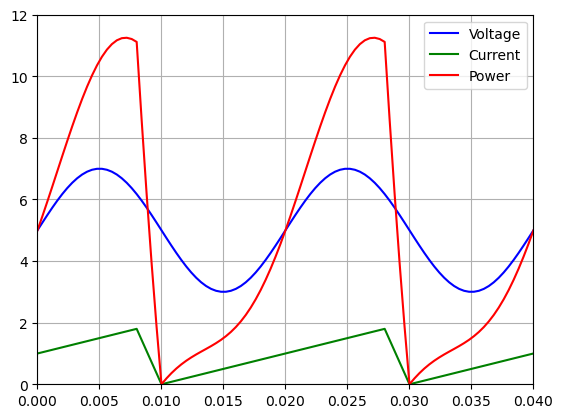

In [39]:
import pandas as pd

df = pd.read_csv("data/current_data.csv")
i = df['current']
i.index = pd.to_timedelta(df['time'], unit='s')
i2 = i.resample('0.4ms').interpolate(method='linear')
current = i2.values  # convert Pandas series to mupy array

# Calculate power
p = v * current

plt.plot(t, v, 'b', label='Voltage')
plt.plot(t, current, 'g', label='Current')
plt.plot(t, p, 'r', label='Power')
plt.legend(loc='best')
plt.grid()
plt.xlim(0, 0.04)
plt.ylim(0, 12)
plt.show()

### Exercise 8
A voltage waveform has been downloaded from an oscilloscope by using PyVISA. The waveform is stored in a CSV file and the file can be accessed as 'data/waveform_data.csv'.The firsr column is the time data and the second column is the voltage data. Load and plot the waveform from the CSV file.

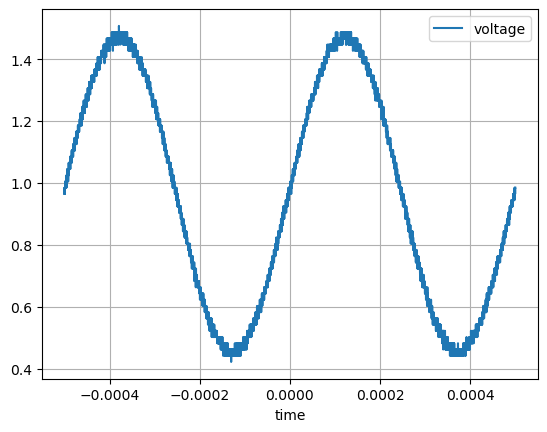

In [43]:
# Hint: use df.set_index('time', inplace=True) to set the 'time' column as the index
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/waveform_data.csv", header=None, names=['time', 'voltage'])
df.set_index('time', inplace=True)

df.plot(grid=True)
plt.show()
